# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

To submit your homework, take the following steps.

1. Save and commit this notebook.
2. Push your changes to GitHub.
3. Confirm that your changes are visible in GitHub.
4. Delete the codespace to avoid wasting your free quota.

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [61]:
import math
import sys

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Titanic disaster](https://www.kaggle.com/c/titanic/data) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/titanic))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [64]:
# YOUR CODE HERE

red_wine = pd.read_csv("wine_quality_red.tsv", sep='\t')
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


The red wine dataset has 12 columns: fixed acity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfure dioxide, denisty, pH, sulphates, alcohol, and target.

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [65]:
# YOUR CODE HERE

red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

Fixed Acidity is the lactic acids that influence the wine’s affecting freshness.
Volatile Acidity is the acetic acid, also known as vinegar that evaporates.
Citric Acid is the acid that adds bright, fresh notes.
Residual Sugar is the sugar that is left after fermentation. This defines sweetness of the wine - dry or sweet.
Chlorides refers to sodium chloride, or salt.
Free Sulfur Dioxide is an active antioxidant and antimicrobial which protects the wine from microbes.
Total Sulfur Dioxide protects the wine.
Density refers to the wine’s alcohol and sugar - higher density often means more sugar and body.
The pH is the measure of acidity - the lower the pH, the more acidic the wine. It affects the wine’s flavor balance.
Sulphates are additives, such as potassium sulfate, that contribute to the free sulfur dioxide levels.
Alcohol is the amount of alcohol by volume in the wine - affects body, warmth, and balance.
Target in this dataset refers to the “Quality Score,” from 1 -10.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

General Data Overview:
DataFrame Shape: (1599, 12)
Descriptive Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46     

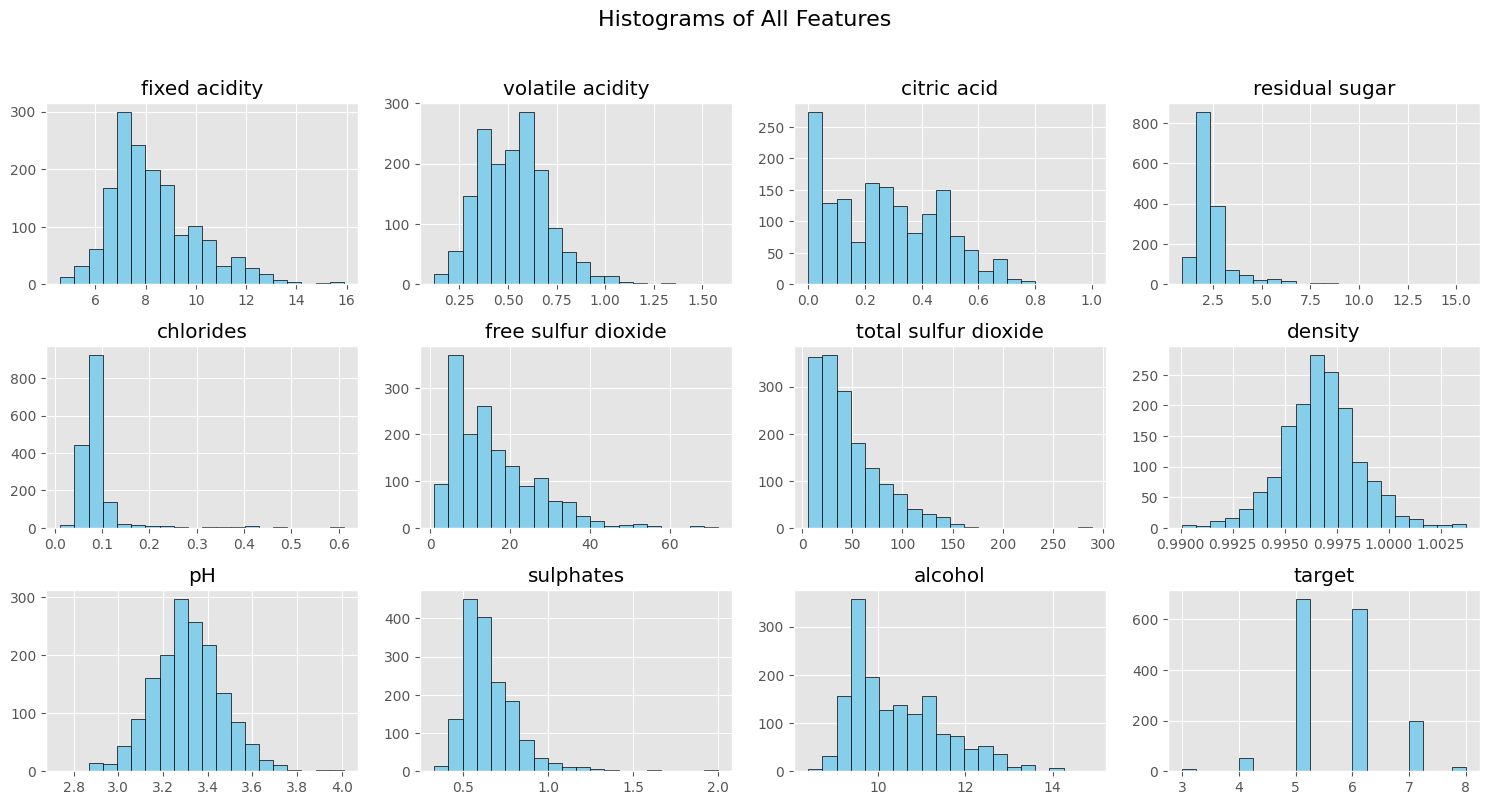

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free sulfur dioxide           -0.15             -0.01        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
target                         0.12             -0.39         0.23   

                      residual sugar  chlorides  free sulfur dioxide 

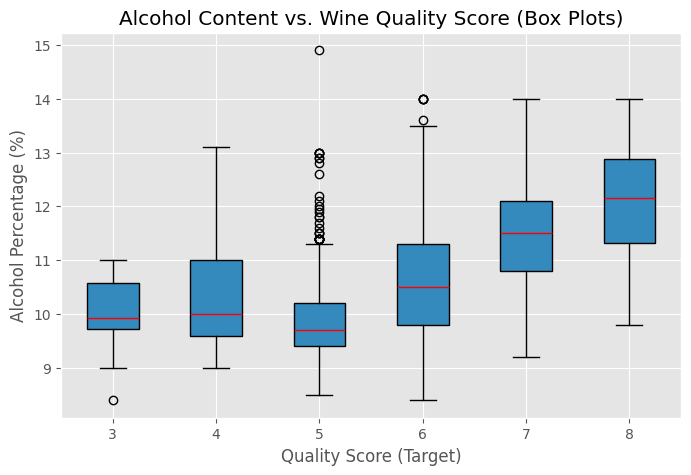

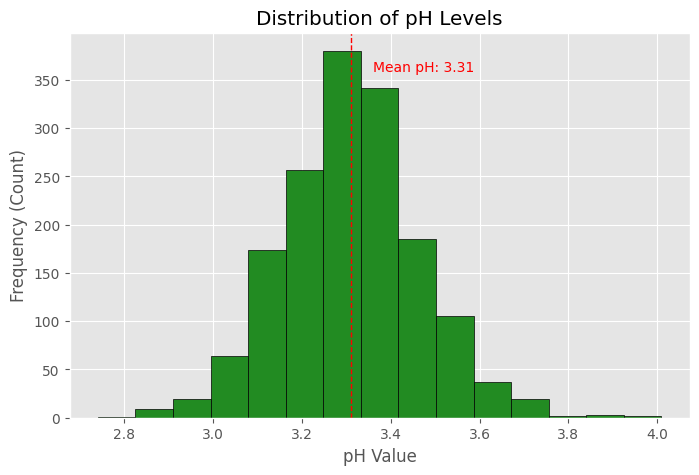

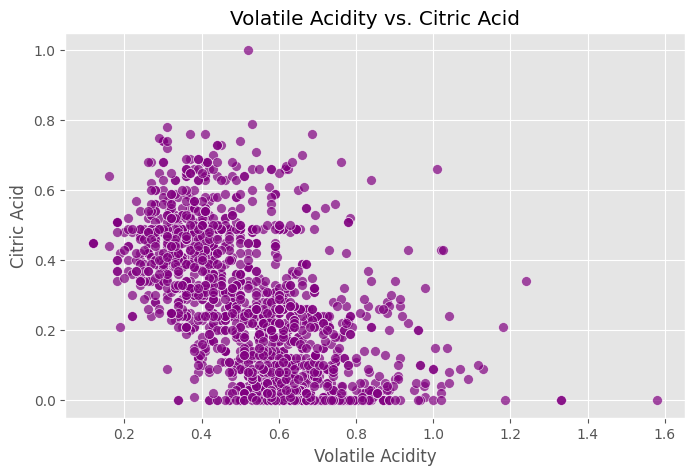

In [66]:
# YOUR CODE HERE

# EXPLORATORY ANALYSIS

# General Information
print("General Data Overview:")
print("DataFrame Shape:", red_wine.shape)
print("Descriptive Statistics:")
print(red_wine.describe().round(2))
print("Target Variable Distribution (Wine Quality Scores):")
print(red_wine['target'].value_counts().sort_index())

# Set up visualization parameters
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Plotting histograms for all features
red_wine.hist(bins=20, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Correlation matrix visualization
corr_matrix = red_wine.corr()
print("Correlation Matrix:")
print(corr_matrix.round(2))

# TOP 3 INTERESTING CHARTS

# Chart 1: The Relationship Between Alcohol Content and Wine Quality (Target)
plt.figure(figsize=(8, 5))
plt.boxplot([red_wine[red_wine['target'] == q]['alcohol'] for q in sorted(red_wine['target'].unique())],
            tick_labels=sorted(red_wine['target'].unique()),
            patch_artist=True, medianprops={'color': 'red'})
plt.title('Alcohol Content vs. Wine Quality Score (Box Plots)')
plt.xlabel('Quality Score (Target)')
plt.ylabel('Alcohol Percentage (%)')
plt.grid(True, axis='y')
plt.show()

# Chart 2: The Distribution of pH Values
plt.figure(figsize=(8, 5))
plt.hist(red_wine['pH'], bins=15, color='forestgreen', edgecolor='black')
plt.title('Distribution of pH Levels')
plt.xlabel('pH Value')
plt.ylabel('Frequency (Count)')
plt.axvline(red_wine['pH'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(red_wine['pH'].mean() + 0.05, plt.ylim()[1] * 0.9, f'Mean pH: {red_wine["pH"].mean():.2f}', color='red')
plt.grid(True, axis='y')
plt.show()

# Chart 3: Scatter Plot of Volatile Acidity vs. Citric Acid
plt.figure(figsize=(8, 5))
plt.scatter(red_wine['volatile acidity'], red_wine['citric acid'], alpha=0.7, color='purple', edgecolors='w', s=50)
plt.title('Volatile Acidity vs. Citric Acid')
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')
plt.grid(True)
plt.show()


Note for Chart 1: Alcohol Content vs. Wine Quality
This box plot visualization clearly shows a strong positive relationship between alcohol content and the perceived quality score of the wine.
As the quality score increases from 5 to 7, the median alcohol percentage of the associated wines consistently rises. Wines rated higher have a significantly higher median alcohol content than those rated lower. This suggests alcohol content is a key driver for higher ratings.

Note for Chart 2: Distribution of pH Levels
The histogram reveals a near-normal distribution for pH values. The plot suggests that wine pH is tightly controlled for consistency. There are no extreme outliers in this small sample, indicating a stable physical property across the dataset.

Note for Chart 3: Volatile Acidity vs. Citric Acid
This scatter plot demonstrates a strong negative correlation between volatile acidity and citric acid content.
Wines with high volatile acidity tend to have low citric acid, and vice versa. This inverse relationship is interesting because both are types of acids, suggesting a potential trade-off or specific winemaking process.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [67]:
# YOUR CODE HERE

# Calculate the correlation matrix using pandas' .corr() method
correlation_matrix = red_wine.corr()

# Optional: Display the correlation matrix neatly
print("Correlation Matrix:")
print(correlation_matrix.round(2))

# Find the most highly correlated pair (excluding self-correlation)
# Unstack the correlation matrix to a Series and sort by absolute value
# We set abs() to find the strongest correlation regardless of positive or negative sign
corr_unstacked = correlation_matrix.abs().unstack()

# Sort the correlations from highest to lowest
sorted_correlations = corr_unstacked.sort_values(kind="quicksort", ascending=False)

# Filter out self-correlations (which are always 1.0) and duplicate pairs
# Get all unique pairs
unique_pairs = sorted_correlations[sorted_correlations < 1.0]

# Extract the single highest correlation value and its pair of columns
most_correlated_pair = unique_pairs.index[0]
correlation_value = unique_pairs.iloc[0]

print(f"Most correlated pair of different columns: {most_correlated_pair}")
print(f"Correlation value: {correlation_value:.2f}")

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.26         0.67   
volatile acidity              -0.26              1.00        -0.55   
citric acid                    0.67             -0.55         1.00   
residual sugar                 0.11              0.00         0.14   
chlorides                      0.09              0.06         0.20   
free sulfur dioxide           -0.15             -0.01        -0.06   
total sulfur dioxide          -0.11              0.08         0.04   
density                        0.67              0.02         0.36   
pH                            -0.68              0.23        -0.54   
sulphates                      0.18             -0.26         0.31   
alcohol                       -0.06             -0.20         0.11   
target                         0.12             -0.39         0.23   

                      residual sugar  chlorides  free sulfur dioxide 

Most correlated pair of different columns are fixed acidity and pH.
The correlation value is 0.68.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [68]:
# YOUR CODE HERE

# The 3 regression model classes that I would like to try are:
# Linear Regression
# Ridge Regression
# ElasticNet Regression

Below are the links to the 3 regression models:

Linear Regression:
* scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* Wikipedia link: https://en.wikipedia.org/wiki/Linear_regression

Ridge Regression:
* scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* Wikipedia link: https://en.wikipedia.org/wiki/Ridge_regression

ElasticNet Regression:
* scikit-learn link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
* Wikipedia link: https://en.wikipedia.org/wiki/Elastic_net_regularization

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

Model Losses:
Linear Regression:
  L1 Loss (MAE): 0.5005
  L2 Loss (MSE): 0.4168

Ridge Regression:
  L1 Loss (MAE): 0.5010
  L2 Loss (MSE): 0.4171

ElasticNet Regression:
  L1 Loss (MAE): 0.5853
  L2 Loss (MSE): 0.5359



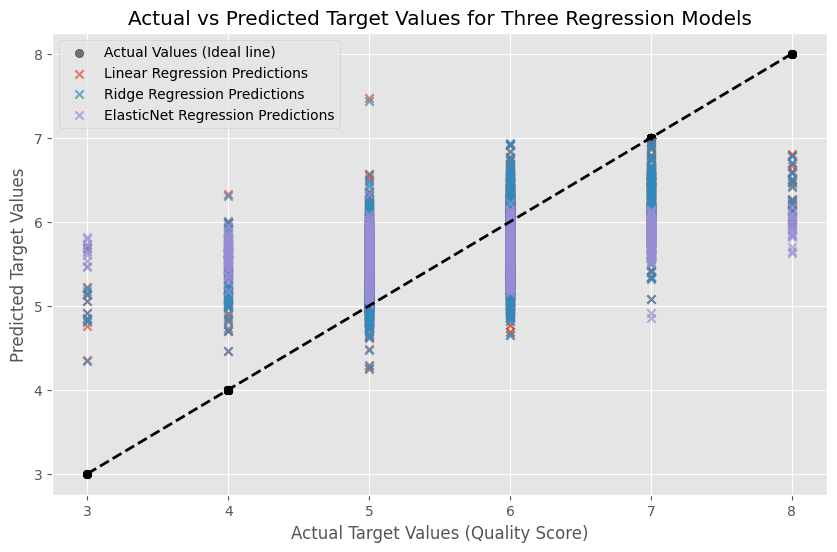

In [69]:
# YOUR CODE HERE

# Define features (X) and target (y)
X = red_wine.drop('target', axis=1)
y = red_wine['target']

# Define three regression models

# Model 1: Linear Regression
model1 = LinearRegression()

# Model 2: Ridge Regression (L2 penalty)
model2 = Ridge(alpha=0.5)

# Model 3: ElasticNet Regression (L1 and L2 penalty), set l1_ratio to 0 for L2 only.
model3 = ElasticNet(alpha=1.0, l1_ratio=0.1) 

models = {
    "Linear Regression": model1,
    "Ridge Regression": model2,
    "ElasticNet Regression": model3
}

# Train models and predict
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    predictions[name] = model.predict(X)

# Compute L1 and L2 losses (MAE and MSE)
results = {}
for name, y_pred in predictions.items():
    l1_loss = mean_absolute_error(y, y_pred)
    l2_loss = mean_squared_error(y, y_pred)
    results[name] = {"L1 Loss (MAE)": l1_loss, "L2 Loss (MSE)": l2_loss}

print("Model Losses:")
for name, losses in results.items():
    print(f"{name}:")
    print(f"  L1 Loss (MAE): {losses['L1 Loss (MAE)']:.4f}")
    print(f"  L2 Loss (MSE): {losses['L2 Loss (MSE)']:.4f}\n")

# Plot actual vs predicted values for all models in one chart
plt.figure(figsize=(10, 6))

# Plot actual values as reference points (scatter plot for actuals)
plt.scatter(y, y, color='black', label='Actual Values (Ideal line)', alpha=0.5)

# Plot predicted values against actual values for each model
for name, y_pred in predictions.items():
    plt.scatter(y, y_pred, label=f'{name} Predictions', alpha=0.7, marker='x')

# Add reference line (y=x)
plt.plot([min(y), max(y)], [min(y), max(y)], '--', lw=2, color='black')

plt.xlabel('Actual Target Values (Quality Score)')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Target Values for Three Regression Models')
plt.legend()
plt.grid(True)
plt.show()

The L1 Loss shows the difference between the actual and predicted values. The lower, the better.
The L2 Loss is senstive to outliers. The lower, the better.

The plot shows a good fit against the prediction line.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [70]:
# YOUR CODE HERE

# Prepare data for modeling
X = red_wine.drop('target', axis=1)
y = red_wine['target']

# Define the three regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0), 
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.1)
}

# Define the L2 loss function (Mean Squared Error) for comparison
l2_loss_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Store results
results_full_train = {}
results_cv_mean = {}

print("Calculating Losses:")

for name, model in models.items():
    print(f"\nProcessing {name}...")

    # Train on the whole data set and calculate training L2 loss
    model.fit(X, y)
    y_pred_full_train = model.predict(X)
    mse_full_train = mean_squared_error(y, y_pred_full_train)
    results_full_train[name] = mse_full_train

    # Perform 5-fold cross-validation and get mean CV L2 loss
    cv_scores_neg_mse = cross_val_score(
        model, 
        X, 
        y, 
        cv=KFold(n_splits=5, shuffle=True, random_state=42), 
        scoring=l2_loss_scorer
    )
    # Convert negative MSE scores back to positive MSE (L2 Loss)
    cv_scores_mse = -cv_scores_neg_mse
    mean_cv_mse = np.mean(cv_scores_mse)
    results_cv_mean[name] = mean_cv_mse
    
    print(f"  Training L2 Loss (Full Data): {mse_full_train:.4f}")
    print(f"  Mean CV L2 Loss (5-Fold):     {mean_cv_mse:.4f}")

# 4. Compare the results in a nicely formatted table
print("\n" + "="*60)
print("Comparison of L2 Losses (Mean Squared Error)")
print(f"{'Model Name':<25} | {'Full Train Loss':<18} | {'Mean CV Loss':<15}")
print("="*60)

for name in models.keys():
    full_loss = results_full_train[name]
    cv_loss = results_cv_mean[name]
    difference = cv_loss - full_loss
    overfitting_sign = "✅ Overfit Likely" if difference > 0.01 else "🟡 Low Overfitting"

    print(f"{name:<25} | {full_loss:<18.4f} | {cv_loss:<15.4f} | {overfitting_sign}")

print("="*60)

Calculating Losses:

Processing Linear Regression...
  Training L2 Loss (Full Data): 0.4168
  Mean CV L2 Loss (5-Fold):     0.4288

Processing Ridge Regression...
  Training L2 Loss (Full Data): 0.4175
  Mean CV L2 Loss (5-Fold):     0.4284

Processing ElasticNet Regression...
  Training L2 Loss (Full Data): 0.5359
  Mean CV L2 Loss (5-Fold):     0.5390

Comparison of L2 Losses (Mean Squared Error)
Model Name                | Full Train Loss    | Mean CV Loss   
Linear Regression         | 0.4168             | 0.4288          | ✅ Overfit Likely
Ridge Regression          | 0.4175             | 0.4284          | ✅ Overfit Likely
ElasticNet Regression     | 0.5359             | 0.5390          | 🟡 Low Overfitting


The output shows that the Linear Regression and Ridge Regression that there is likely an Overfit because their L2 Losses for the full dataset is lower than the L2 for the 5 Fold Cross Validation. With the ElasticNet Regression, this is not the case and therefore, Overfitting is low.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [71]:
# YOUR CODE HERE

# Define features (X) and target (y)
X = red_wine.drop('target', axis=1)
y = red_wine['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build models using scikit-learn pipelines

# Pipeline for Linear Regression (no regularization, equivalent to alpha=0 but we use LinearRegression object)
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Pipeline for Ridge Regression (L2 regularization)
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])

# Pipeline for ElasticNet Regression (L1 and L2 regularization)
pipeline_elasticnet = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))
])

# Train models and compare L2 losses (Mean Squared Error)

models = {
    "Linear Regression": pipeline_linear,
    "Ridge Regression": pipeline_ridge,
    "ElasticNet Regression": pipeline_elasticnet
}

l2_losses = {}

for name, model in models.items():
    # Fit the model within the pipeline (StandardScaler fits and transforms X_train, then transforms X_test)
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate Mean Squared Error (L2 loss is the sum of squared errors, MSE is the average)
    mse = mean_squared_error(y_test, y_pred)
    l2_losses[name] = mse

# Print the results

print("L2 Losses (Mean Squared Error) for each model:")
for name, loss in l2_losses.items():
    print(f"* {name}: {loss:.4f}")


L2 Losses (Mean Squared Error) for each model:
* Linear Regression: 0.4112
* Ridge Regression: 0.4112
* ElasticNet Regression: 0.6362


For the Linear Regression L2 Loss for Number 6 is 0.4168 which is higher than the L2 Loss of 0.4112 in Number 8. The Ridge Regression L2 Loss for Number 6 is 
0.4171 which is higher than the L2 Loss of 0.4112 in Number 8. The ElasticNet Regression L2 Loss for Number 6 is 0.5359 which is lower than the L2 Loss of 0.6362 in Number 8.

The L2 Loss for the Linear Regression and Ridge Regression are equal to one another at 0.4112.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [72]:
# YOUR CODE HERE

# See the explanation below.

Overall, this method is not efficient or effective. When using 1000 models, there are more effective methods such as Ranfom Forests to acommplish this.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [73]:
# YOUR CODE HERE

# The best model I chose was Ridge Regression. (See more below.)

The best model I thought was the Ridge Regression. I wanted to work with a model we have not yet worked with in this course and wanted to learn another model. After conducting some research on scikit-learn documentation, I decided to include it in this project. I looked at the Ridge Regression model because of the multicollinearity, meaning it is highly correlated to predictor variables. There can be a chance of overfitting meaning it can learn the training data very well. For the regular results, the L2 Loss was 0.4171, for the preprocessed results, it is 0.4112 (tied with the Linear Regression), and for the 5 Fold data, it is 0.4175 for the full data, and the L2 Loss for the 5 Fold CV is 0.4284 (the lowest).

I also decided to include the Linear Regression model as we have used it all semester. I wanted a model that I could compare to the other models. The Linear Regression is a supervised model. It provides a relationshio between the features (independent variables) and the target (dependent variable). For Linear Regression, the regular results were the lowest at 0.4168, the preprossed results equaled 0.4112 (same as Ridge Regression), and for the 5 Fold CV results, there was a likely overfit. The L2 Loss for the full data was at 0.4168 (the lowest) and 0.4284 for the 5 Fold CV data. 

ElasticNet Regression is a regularlized linear regression that uses both L1 Regularlization and L2 Regularlization. It also handles correlated features. The downsides of this model is underfitting and has a higher L2 Loss compared to the other models. By looking at the L2 Loss values, ElasticNet Regression is highest than the others in all cases. For the regular results it was 0.5359, 0.6362 for the preprocessed data, and for the full dataset it was 0.5359 and the 5 Fold CV at 0.5390.